In [0]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
#import os
#import zipfile

#local_zip = '/tmp/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

The contents of the .zip are extracted to the base directory /tmp/cats_and_dogs_filtered, which contains train and validation subdirectories for the training and validation datasets 

In [0]:
base_dir = '/content/gdrive/My Drive/Colab Notebooks/Udemy_DL_Conv/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')


Now, let's see what the filenames look like in the cats and dogs train directories (file naming conventions are the same in the validation directory):

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.37.jpg', 'cat.370.jpg', 'cat.3700.jpg', 'cat.3703.jpg', 'cat.3702.jpg', 'cat.3701.jpg', 'cat.3708.jpg', 'cat.3706.jpg', 'cat.3705.jpg', 'cat.3704.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(test_cats_dir)))
print('total validation dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 4000
total training dog images: 4000
total validation cat images: 1000
total validation dog images: 1000


For both cats and dogs, we have 4,000 training images and 1000 test images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:




In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

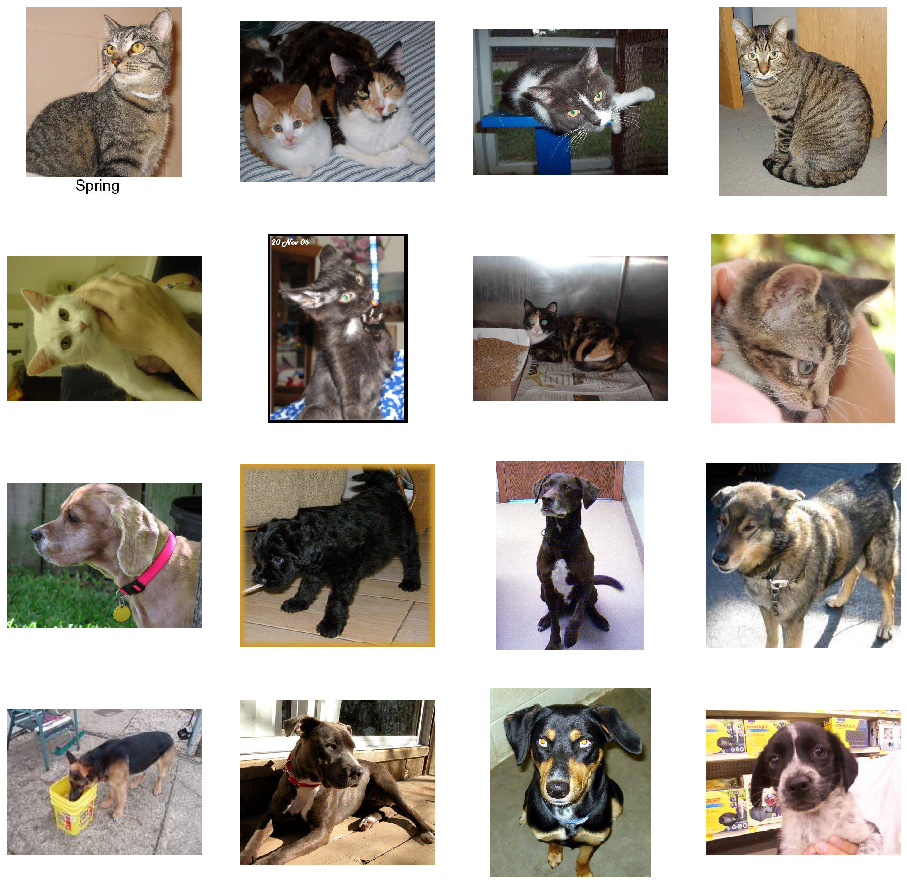

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Let's build a convolution neural network by training it on the training images and then use it to classify the pictures in the test set

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization, Dropout
from keras import optimizers

Using TensorFlow backend.


In [0]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Conv2D(64,(3,3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Flatten())

classifier.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))


classifier.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

optimizer=optimizers.adam(lr=0.001)

classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image  import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.25,
                                 zoom_range=0.2,horizontal_flip = True)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set= train_datagen.flow_from_directory(train_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')

test_set= train_datagen.flow_from_directory(test_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
history = classifier.fit_generator(training_set,
                                   samples_per_epoch=4000,
                                   nb_epoch=10,
                                   validation_data=test_set,
                                   nb_val_samples=1000)

Epoch 1/10
125/125 [==============================] - 527s 4s/step - loss: 0.6278 - acc: 0.6593 - val_loss: 0.6532 - val_acc: 0.6239
Epoch 2/10
125/125 [==============================] - 230s 2s/step - loss: 0.6270 - acc: 0.6667 - val_loss: 0.7271 - val_acc: 0.5811
Epoch 3/10
125/125 [==============================] - 227s 2s/step - loss: 0.5879 - acc: 0.6897 - val_loss: 0.7856 - val_acc: 0.5813
Epoch 4/10
125/125 [==============================] - 228s 2s/step - loss: 0.5671 - acc: 0.7087 - val_loss: 0.5429 - val_acc: 0.7336
Epoch 5/10
125/125 [==============================] - 235s 2s/step - loss: 0.5410 - acc: 0.7330 - val_loss: 1.1132 - val_acc: 0.5192
Epoch 6/10
125/125 [==============================] - 235s 2s/step - loss: 0.5166 - acc: 0.7478 - val_loss: 0.5062 - val_acc: 0.7541
Epoch 7/10
125/125 [==============================] - 229s 2s/step - loss: 0.5185 - acc: 0.7412 - val_loss: 0.4914 - val_acc: 0.7649
Epoch 8/10
125/125 [==============================] - 230s 2s/step - 